In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

Imputing missing values is a good exercise for any aspiring Data Scientist.  In particular, the process of imputing is not new -- it is much like other preprocessing and representation efforts -- and differs from such in only one significant manner. <br/><br/> 

Here are the attributes for the Data:
1. __Prev:__ True(1) if already taken a Calculus 1 Course.
2. __Major:__ One of the following:
    *  __STEM__ = Science, Technology, Engineering, or Mathematics 
    *  __PMED__ = Pre med 
    *  __BUSN__ = Business, Accounting, Finance, or Marking 
    *  __ARHU__ = Arts or the Humanities 
    *  __OTHR__ = None of the majors listed above<br/><br/>
3. __TOD:__  Either __Morning, Evening,__ or __Afternoon__ 
4. __GPA:__ GPA on a 4 point scale 
5. __Exam1:__ Score on First Exam in current Calculus Course
6. __Exam2:__ Score on Second Exam in current Calculus Course
7. __Exam3:__ Score on Third Exam in current Calculus Course
8. __Exam4:__ Score on Fourth Exam in current Calculus Course


__TARGET (RESPONSE) IS THE FINAL COLUMN:__ 
The final column __Calc2__ is True (1) if student enrolled in Calculus 2 the next semester or False (0) if they did not. 

In [2]:
ls *.csv  # should see your files

 Volume in drive C is Windows
 Volume Serial Number is C2D6-EBDB

 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam


 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam


 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam


 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam


 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam


 Directory of C:\Users\manub\OneDrive\Desktop\Fall 2022\Predictive analytics\Midterm Exam

10/18/2022  09:04 PM             7,538 BrightManuTest.csv
10/18/2022  09:04 PM            37,295 BrightManuTrain.csv
               2 File(s)         44,833 bytes
               0 Dir(s)  156,306,878,464 bytes free


We load our training data set

In [3]:
Calc2Df = pd.read_csv('BrightManuTrain.csv')
Calc2Df.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,STEM,Afternoon,3.44,77,82,NaN,96.0,1
1,0,STEM,Morning,3.10,85,73,86.0,93.0,1
2,0,????,Evening,3.43,84,48,83.0,NaN,1
3,0,ARHU,Morning,2.70,67,84,NaN,66.0,0
4,1,STEM,Morning,2.10,82,83,80.0,NaN,1


We look at the summary statistics of the data by running the descriptives

In [4]:
Calc2Df.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
count,1000.000000,1000.000000,1000.000000,1000.000000,830.000000,582.000000,1000.000000
mean,0.199000,2.496150,81.950000,79.444000,77.431325,73.948454,0.494000
std,0.399448,1.018326,7.943715,10.042595,12.723732,15.714123,0.500214
min,0.000000,0.300000,47.000000,48.000000,29.000000,44.000000,0.000000
25%,0.000000,1.757500,77.000000,72.000000,70.000000,59.000000,0.000000
50%,0.000000,2.600000,83.000000,79.500000,81.000000,68.500000,0.000000
75%,0.000000,3.310000,87.000000,86.000000,86.000000,89.000000,1.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,1.000000


Observe that features, 'Prev', 'GPA', 'Exam1' and 'Exam2' have no missing values. However, the data for features 'Exam3' and 'Exam4' have missing values. 250 students of the total number of students had a score of 86 and above in all the four Calculus 1 exams. Notice that they all took Calculus 2 during the next semester.

Lets's explore the missing values further.

In [5]:
Calc2Df.isnull().sum()

Prev       0
Major      0
TOD        0
GPA        0
Exam1      0
Exam2      0
Exam3    170
Exam4    418
Calc2      0
dtype: int64

This indicates that there are 170 missing values in Exam3 and 418 missing values in Exam4. We will later impute the missing values and compare the results to newly generated data.

Let's look at a bar chart of the data indicating the missing values in the data

<AxesSubplot:>

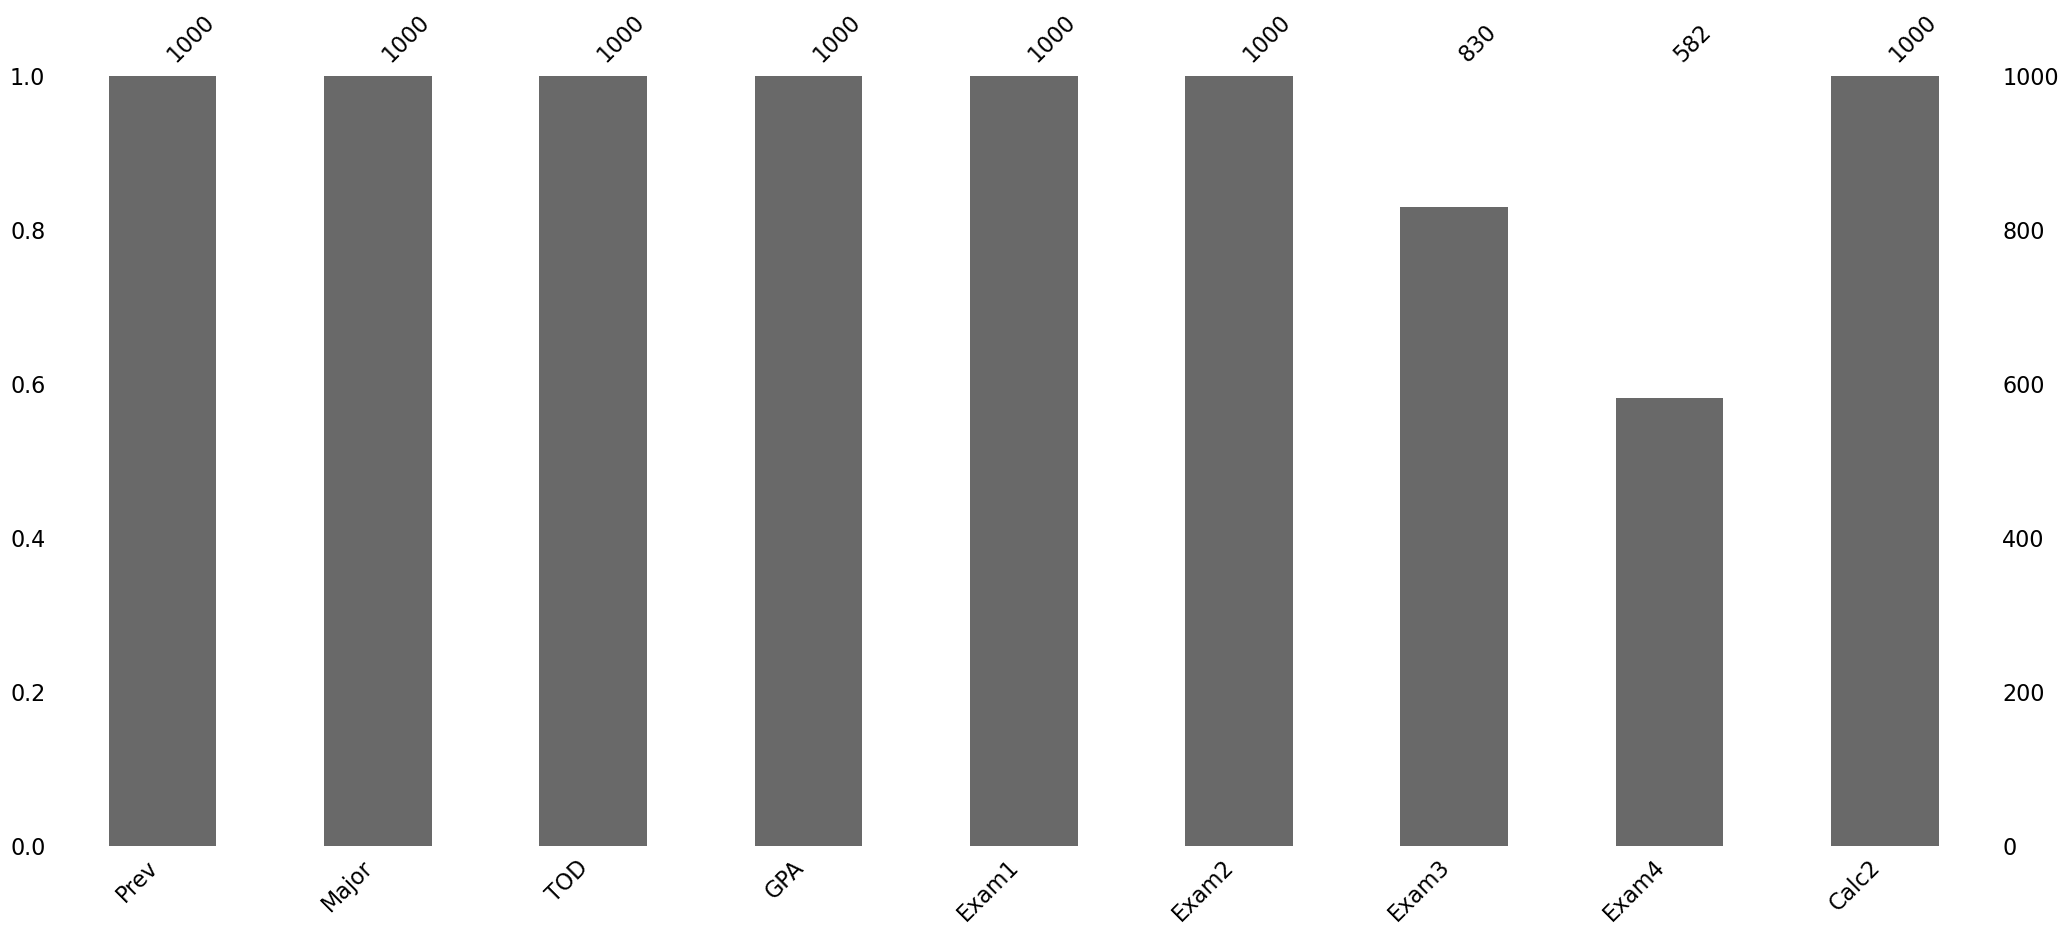

In [6]:
msno.bar(Calc2Df)

In [7]:
XCalcDf = Calc2Df.drop(['Calc2'], axis=1)
Target = Calc2Df.Calc2
XCalcDf.drop(['Prev','Major','TOD','GPA','Exam1','Exam2'], axis=1, inplace = True)
XCalcDf.head()

,Exam3,Exam4
0,NaN,96.0
1,86.0,93.0
2,83.0,NaN
3,NaN,66.0
4,80.0,NaN


We now look at histogram of Exam3 and Exam4 before imputation

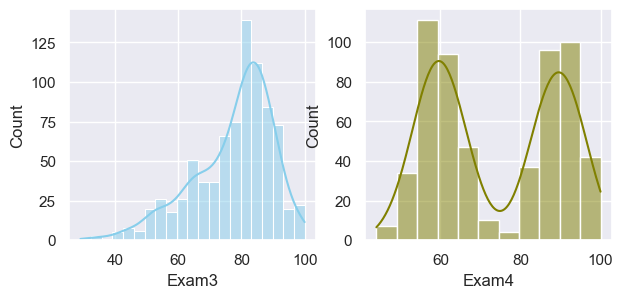

In [8]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=Calc2Df, x="Exam3", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=Calc2Df, x="Exam4", kde=True, color="olive", ax=axs[1])

plt.show()

Observe that the distribution for Exam 3 is negatively skewed. We also see that we have a bimodal distribution for Exam 4. We expect that after imputation, the distribution for the imputed Exam 3 and imputed Exam 4 to be close to the original distribution.

Let's impute the missing values using K Nearest Neighbors imputation method using our k=1 and we check how this imputation affects the mean and standard deviation of the original data

In [9]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=1)
X_kn1 = XCalcDf[['Exam3','Exam4']]
X_kn1 = imp.fit_transform(X_kn1)
X_kn1 = pd.DataFrame(X_kn1, columns = ['Exam3','Exam4'])
X_kn1.head()

,Exam3,Exam4
0,97.0,96.0
1,86.0,93.0
2,83.0,89.0
3,82.0,66.0
4,80.0,87.0


In [10]:
TFeatures = Calc2Df.drop(['Exam3','Exam4','Calc2'], axis=1)
TFeatures_new2 = pd.concat([TFeatures,X_kn1], axis=1 )  
TFeatures_new2.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,0,STEM,Afternoon,3.44,77,82,97.0,96.0
1,0,STEM,Morning,3.10,85,73,86.0,93.0
2,0,????,Evening,3.43,84,48,83.0,89.0
3,0,ARHU,Morning,2.70,67,84,82.0,66.0
4,1,STEM,Morning,2.10,82,83,80.0,87.0


Now let's check the summary statistics for the data including the KNN imputed numeric values 

In [11]:
TFeatures_new2.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.199000,2.496150,81.950000,79.444000,77.537742,74.145804
std,0.399448,1.018326,7.943715,10.042595,12.402064,15.378049
min,0.000000,0.300000,47.000000,48.000000,29.000000,44.000000
25%,0.000000,1.757500,77.000000,72.000000,72.000000,59.750000
50%,0.000000,2.600000,83.000000,79.500000,80.000000,73.948454
75%,0.000000,3.310000,87.000000,86.000000,86.000000,89.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000


Notice that the means and standard deviation for before imputation and after imputation for Exam 3 and Exam 4 differ by a very small margin. The margin for the standard deviation indicates that the spread of the original data and that of the KNN imputed data is almost exactly the same. Let's look at histograms of imputed Exam 3 and Exam 4

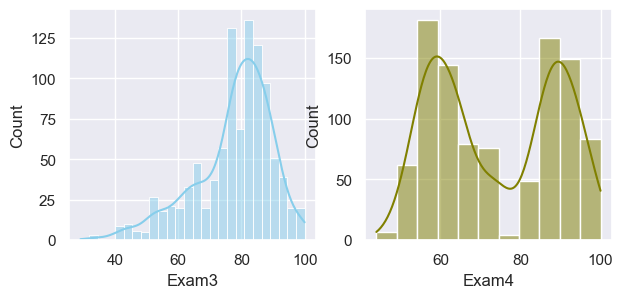

In [12]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=X_kn1, x="Exam3", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=X_kn1, x="Exam4", kde=True, color="olive", ax=axs[1])

plt.show()

Observe that the distribution of imputed Exam 3 is also negatively skewed. Also, the we see that we have a bimodal distribution for imputed Exam 4. Thus, the two distributions will have close common characteristics. So, KNN imputation method may be a good method for the missing values imputation. 

However, let's consider the Mice Imputation method and see how that also play with the data and the distributions of both Exam 3 and Exam 4 look like.

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from autoimpute.imputations import MiceImputer

imputer=IterativeImputer(imputation_order='ascending',max_iter=10, random_state=42,n_nearest_features=1)
imputer
ImputedExam = imputer.fit_transform(XCalcDf)
Xdf = pd.DataFrame(ImputedExam, columns = ['Exam3','Exam4'])
Xdf.head()

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,Exam3,Exam4
0,90.715305,96.000000
1,86.000000,93.000000
2,83.000000,78.119014
3,72.539194,66.000000
4,80.000000,75.898563


In [14]:
TFeatures = Calc2Df.drop(['Exam3','Exam4','Calc2'], axis=1)
TFeatures_new1 = pd.concat([TFeatures,Xdf], axis=1 )  
TFeatures_new1.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,0,STEM,Afternoon,3.44,77,82,90.715305,96.000000
1,0,STEM,Morning,3.10,85,73,86.000000,93.000000
2,0,????,Evening,3.43,84,48,83.000000,78.119014
3,0,ARHU,Morning,2.70,67,84,72.539194,66.000000
4,1,STEM,Morning,2.10,82,83,80.000000,75.898563


In [15]:
TFeatures_new1.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.199000,2.496150,81.950000,79.444000,77.346031,73.934227
std,0.399448,1.018326,7.943715,10.042595,11.982068,13.247621
min,0.000000,0.300000,47.000000,48.000000,29.000000,38.150896
25%,0.000000,1.757500,77.000000,72.000000,70.000000,62.000000
50%,0.000000,2.600000,83.000000,79.500000,79.000000,73.934227
75%,0.000000,3.310000,87.000000,86.000000,86.000000,85.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000


Notice that the mean differences for the origianl data and the MICE imputed data differ by a very little margin. For the Standard deviation, that of the imputed is fairly smaller than that of the original indicating that, the imputation reduced the spread of the original data. But let's look at the histograms for both Imputed Exam scores.

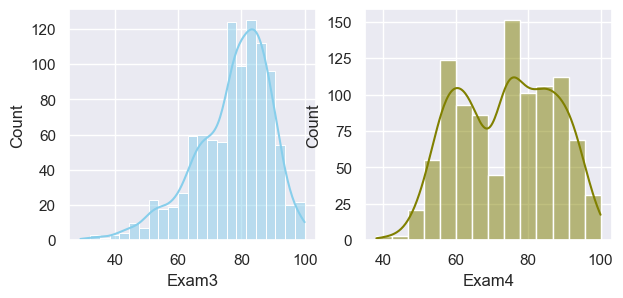

In [16]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=Xdf, x="Exam3", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=Xdf, x="Exam4", kde=True, color="olive", ax=axs[1])

plt.show()

Observe that the distribution for Exam 3 scores is also negatively skewed and close to being bimodal. Considering the distribution for Exam 4, it appears that more information have been added to the data especially between scores 60 and 80.

We will consider using the KNN imputed values for the analysis since it adds very little amount of information to the original data.

Now we impute the missing values for the Categorical feature 'Major'

In [17]:
TFeatures_new = pd.concat([TFeatures_new2,Target], axis=1 )  
TFeatures_new.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,STEM,Afternoon,3.44,77,82,97.0,96.0,1
1,0,STEM,Morning,3.10,85,73,86.0,93.0,1
2,0,????,Evening,3.43,84,48,83.0,89.0,1
3,0,ARHU,Morning,2.70,67,84,82.0,66.0,0
4,1,STEM,Morning,2.10,82,83,80.0,87.0,1


Let's look at the mutual information score before and after imputation of categorical data so that we can compare and observe how much information is lost or gained.

In [18]:
from sklearn.metrics import normalized_mutual_info_score
Calc2Dfred = TFeatures_new[TFeatures_new.Major != '????']
normalized_mutual_info_score(Calc2Dfred.Major, Calc2Dfred.Calc2)

0.10721989390344905

In [19]:
CatCalcDf = TFeatures_new.drop(['Major'], axis=1)
MissingCat1 = pd.DataFrame(TFeatures_new, columns = ['Major'])
MissingCat1.head()

,Major
0,STEM
1,STEM
2,????
3,ARHU
4,STEM


Now we replace the missing categorical values with NA's so we can do the imputation

In [20]:
new_data = MissingCat1.replace({'Major':{'????':'NA'}})
new_data.head()

,Major
0,STEM
1,STEM
2,NA
3,ARHU
4,STEM


Now let's look at the imputation of categorical data (Major) using the Simple Imputation method

In [21]:
from numpy import isnan
from sklearn.impute import SimpleImputer
value = new_data.values

imputer = SimpleImputer(missing_values='NA',
                        strategy='most_frequent')
Transformed_values = imputer.fit_transform(value)
Imputed_Missing = pd.DataFrame(Transformed_values, columns = ['Major'])
Imputed_Missing.head()

,Major
0,STEM
1,STEM
2,STEM
3,ARHU
4,STEM


In [22]:
Calc2Dfnew = TFeatures_new.copy()
TFeatures_new['Major']=Imputed_Missing.Major
TFeatures_new.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,STEM,Afternoon,3.44,77,82,97.0,96.0,1
1,0,STEM,Morning,3.10,85,73,86.0,93.0,1
2,0,STEM,Evening,3.43,84,48,83.0,89.0,1
3,0,ARHU,Morning,2.70,67,84,82.0,66.0,0
4,1,STEM,Morning,2.10,82,83,80.0,87.0,1


Now let's check the mutual information score after imputation

In [23]:
normalized_mutual_info_score(TFeatures_new.Major, TFeatures_new.Calc2)

0.08384216428495067

Notice that the difference between the mutual information score before and after imputation of categorical data is less than 5%. This indicates that there is not too much information loss and thus it is okay to use the data obtained by the imputation method used.

In [24]:
TFeat = TFeatures_new.drop(['Calc2'], axis=1)
Response = TFeatures_new.Calc2
TFeat.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,0,STEM,Afternoon,3.44,77,82,97.0,96.0
1,0,STEM,Morning,3.10,85,73,86.0,93.0
2,0,STEM,Evening,3.43,84,48,83.0,89.0
3,0,ARHU,Morning,2.70,67,84,82.0,66.0
4,1,STEM,Morning,2.10,82,83,80.0,87.0


In [25]:
TFeat['mean'] = TFeat[['Exam1','Exam2','Exam3','Exam4']].mean(axis=1)
TFeat['stdv'] = TFeat[['Exam1','Exam2','Exam3','Exam4']].std(axis=1)
TFeat

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,mean,stdv
0,0,STEM,Afternoon,3.44,77,82,97.0,96.0,88.00,10.033278
1,0,STEM,Morning,3.10,85,73,86.0,93.0,84.25,8.301606
2,0,STEM,Evening,3.43,84,48,83.0,89.0,76.00,18.850287
3,0,ARHU,Morning,2.70,67,84,82.0,66.0,74.75,9.569918
4,1,STEM,Morning,2.10,82,83,80.0,87.0,83.00,2.943920
...,...,...,...,...,...,...,...,...,...,...
995,0,STEM,Afternoon,3.90,90,91,92.0,83.0,89.00,4.082483
996,0,STEM,Morning,3.05,82,80,90.0,86.0,84.50,4.434712
997,1,PMED,Morning,3.32,86,80,81.0,91.0,84.50,5.066228
998,0,OTHR,Evening,1.04,76,82,51.0,62.0,67.75,13.961256


Now we want to cluster the data based on the mean and standard deviation

In [26]:
from sklearn.cluster import SpectralClustering
clstr = SpectralClustering(n_clusters = 2, 
                           affinity = 'nearest_neighbors',
                           n_neighbors=20,
                           assign_labels='cluster_qr')
preds = clstr.fit_predict(TFeat[['mean','stdv']])

In [27]:
from sklearn.metrics import homogeneity_score, completeness_score, rand_score

homogeneity score = 0.24600


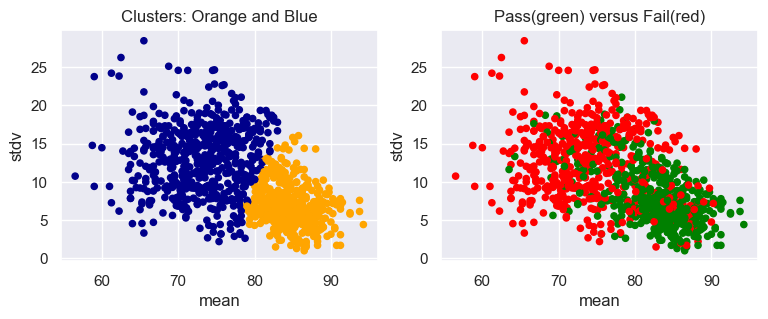

In [28]:
fig,ax = plt.subplots(1,2,figsize = (9,3));
clrs = [ ['orange','darkblue'][i] for i in preds]
TFeat.plot.scatter('mean','stdv', color = clrs, ax = ax[0],
                      title = 'Clusters: Orange and Blue');
clrs = [ ['red','green'][i] for i in Response]
TFeat.plot.scatter('mean','stdv', color = clrs, ax = ax[1],
                      title = 'Pass(green) versus Fail(red)');
print('homogeneity score = %.5f' % homogeneity_score(Response, preds))

Now we try and compare the exam scores. So we do a principal component analysis

In [29]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4)
ExamComps = pca.fit_transform(TFeat[['Exam1','Exam2','Exam3','Exam4']])
pca.explained_variance_ratio_

array([0.54009457, 0.18252978, 0.16887166, 0.10850399])

Notice that the first two components explains 72% of the variance. Thus only two measures are not sufficient in explaining the variation in the data.
Let's look at clustering the data again with the first two companies

In [30]:
ExamCompsDf = pd.DataFrame(ExamComps, columns = ['pc1','pc2','pc3','pc4'])
ExamCompsDf.head()

,pc1,pc2,pc3,pc4
0,-28.175557,-2.296079,5.261943,7.784532
1,-20.713612,5.508066,-4.283716,-0.418826
2,-15.953200,30.018482,-9.301647,1.129838
3,6.073641,-3.369633,9.477925,13.872667
4,-12.015696,-4.611082,-4.080072,1.286349


In [31]:
clstr = SpectralClustering(n_clusters = 2, 
                           affinity = 'nearest_neighbors',
                           n_neighbors=20,
                           assign_labels='cluster_qr')
preds = clstr.fit_predict( ExamCompsDf[['pc1','pc2']])

homogeneity score = 0.30314


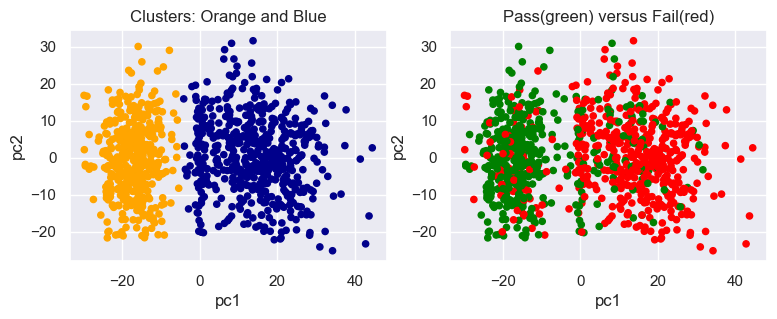

In [32]:
fig,ax = plt.subplots(1,2,figsize = (9,3));
clrs = [ ['orange','darkblue'][i] for i in preds]
ExamCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[0],
                      title = 'Clusters: Orange and Blue');
clrs = [ ['red','green'][i] for i in Response]
ExamCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[1],
                      title = 'Pass(green) versus Fail(red)');
print('homogeneity score = %.5f' % homogeneity_score(Response, preds))

Now we do an encoding of our non-numeric features using the one-hot encoder

In [33]:
from sklearn.preprocessing import OneHotEncoder
categories = TFeat.select_dtypes(exclude = [int,float]).columns
categories

Index(['Major', 'TOD'], dtype='object')

In [34]:
ohe = OneHotEncoder( dtype = int )
TFeat1 = TFeat.copy()

for category in categories: 
    encoded = ohe.fit_transform( TFeat[ [category] ] )
    oheDf = pd.DataFrame( encoded.todense(), 
                          columns = ohe.categories_[0])

    TFeat1 = pd.concat([oheDf,TFeat1], axis=1 )  
    TFeat1.drop(category, axis=1, inplace=True)
TFeat1.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4,mean,stdv
0,1,0,0,0,0,0,0,1,0,3.44,77,82,97.0,96.0,88.00,10.033278
1,0,0,1,0,0,0,0,1,0,3.10,85,73,86.0,93.0,84.25,8.301606
2,0,1,0,0,0,0,0,1,0,3.43,84,48,83.0,89.0,76.00,18.850287
3,0,0,1,1,0,0,0,0,0,2.70,67,84,82.0,66.0,74.75,9.569918
4,0,0,1,0,0,0,0,1,1,2.10,82,83,80.0,87.0,83.00,2.943920


In [35]:
TFeat11 = TFeat1.drop(['mean','stdv'], axis=1)
TFeat11.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,0,0,1,0,3.44,77,82,97.0,96.0
1,0,0,1,0,0,0,0,1,0,3.10,85,73,86.0,93.0
2,0,1,0,0,0,0,0,1,0,3.43,84,48,83.0,89.0
3,0,0,1,1,0,0,0,0,0,2.70,67,84,82.0,66.0
4,0,0,1,0,0,0,0,1,1,2.10,82,83,80.0,87.0


In [36]:
pd.pivot_table(TFeat11,  
               values = TFeat11.columns, 
               index = Response, aggfunc = [np.mean])

mean                                                      \
           ARHU Afternoon      BUSN   Evening      Exam1      Exam2   
Calc2                                                                 
0      0.183794  0.391304  0.191700  0.292490  80.122530  79.717391   
1      0.012146  0.366397  0.129555  0.204453  83.821862  79.163968   

                                                                               \
           Exam3      Exam4       GPA   Morning      OTHR      PMED      Prev   
Calc2                                                                           
0      72.093619  64.917791  2.134032  0.316206  0.201581  0.189723  0.116601   
1      83.114112  83.597980  2.867065  0.429150  0.161943  0.117409  0.283401   

                 
           STEM  
Calc2            
0      0.233202  
1      0.578947

Notice that there is a high significant difference between the means of a student from the Arts and Humanities with respect to whether the student took Calc 2 or not. This is similar for Exam 3 and Exam 4 and several other features.

Now we scale the data

In [37]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler( feature_range = (0,1) )
RedTFeat11Array = sclr.fit_transform(TFeat11) 
RedTFeat11 = pd.DataFrame(RedTFeat11Array,
                              columns = TFeat11.columns,
                              index = TFeat11.index)
RedTFeat11.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.848649,0.566038,0.653846,0.957746,0.928571
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.756757,0.716981,0.480769,0.802817,0.875000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.845946,0.698113,0.000000,0.760563,0.803571
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.648649,0.377358,0.692308,0.746479,0.392857
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.486486,0.660377,0.673077,0.718310,0.767857


Let's look at which features play the most and least important roles in predict the response but first we need to rescale the data

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(RedTFeat11, Response)
model.coef_[0]

array([-0.05865408, -0.13777207,  0.19760766, -1.35254743,  0.0192179 ,
        0.33276291,  0.00484268,  0.99690545,  0.47850737,  2.17245383,
        1.57962167, -0.28605867,  2.80029479,  3.52633825])

A plot indicating feature importance

Feature: Afternoon, Score: -0.05865
Feature: Evening, Score: -0.13777
Feature: Morning, Score: 0.19761
Feature: ARHU, Score: -1.35255
Feature: BUSN, Score: 0.01922
Feature: OTHR, Score: 0.33276
Feature: PMED, Score: 0.00484
Feature: STEM, Score: 0.99691
Feature: Prev, Score: 0.47851
Feature: GPA, Score: 2.17245
Feature: Exam1, Score: 1.57962
Feature: Exam2, Score: -0.28606
Feature: Exam3, Score: 2.80029
Feature: Exam4, Score: 3.52634


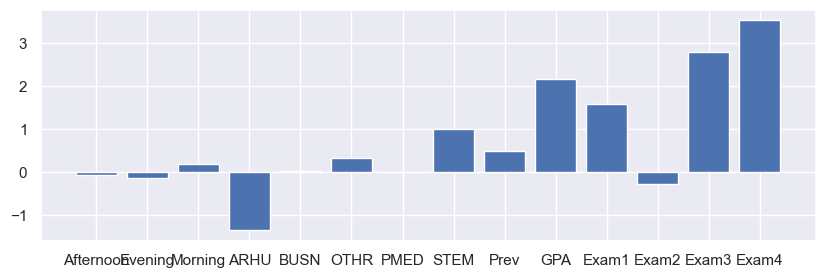

In [71]:
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (RedTFeat11.columns[i],v))

plt.figure(figsize=(10,3))
plt.bar(RedTFeat11.columns, importance);

Let's take away all insignificant features

In [72]:
InsignificantColumns = ['Afternoon','Evening','Morning','BUSN','PMED','Exam2']
RedXtrain1 = RedTFeat11.drop(InsignificantColumns, axis = 1)
RedXtrain1

,ARHU,OTHR,STEM,Prev,GPA,Exam1,Exam3,Exam4
0,0.0,0.0,1.0,0.0,0.848649,0.566038,0.957746,0.928571
1,0.0,0.0,1.0,0.0,0.756757,0.716981,0.802817,0.875000
2,0.0,0.0,1.0,0.0,0.845946,0.698113,0.760563,0.803571
3,1.0,0.0,0.0,0.0,0.648649,0.377358,0.746479,0.392857
4,0.0,0.0,1.0,1.0,0.486486,0.660377,0.718310,0.767857
...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.972973,0.811321,0.887324,0.696429
996,0.0,0.0,1.0,0.0,0.743243,0.660377,0.859155,0.750000
997,0.0,0.0,0.0,1.0,0.816216,0.735849,0.732394,0.839286
998,0.0,1.0,0.0,0.0,0.200000,0.547170,0.309859,0.321429


Feature: ARHU, Score: -1.39637
Feature: OTHR, Score: 0.31070
Feature: STEM, Score: 0.97906
Feature: Prev, Score: 0.46669
Feature: GPA, Score: 2.17605
Feature: Exam1, Score: 1.61670
Feature: Exam3, Score: 2.85805
Feature: Exam4, Score: 3.52309


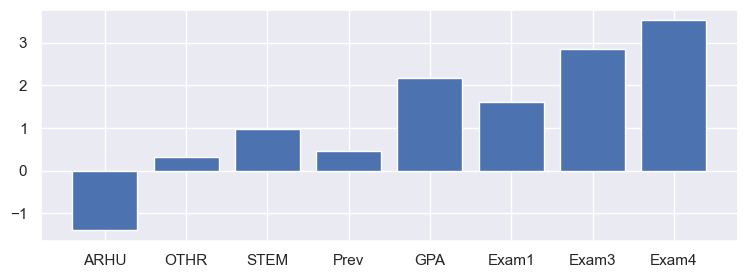

In [73]:
model = LogisticRegression()
model.fit(RedXtrain1, Response)
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (RedXtrain1.columns[i],v))

plt.figure(figsize=(9,3))
plt.bar(RedXtrain1.columns, importance);

Let's look at our random forest classifers

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(
        RedTFeat11, #
        Response,
        train_size=0.80, 
        random_state=1234)

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dtc.fit(X_train, y_train)
dtc.score(X_test,y_test)

0.81

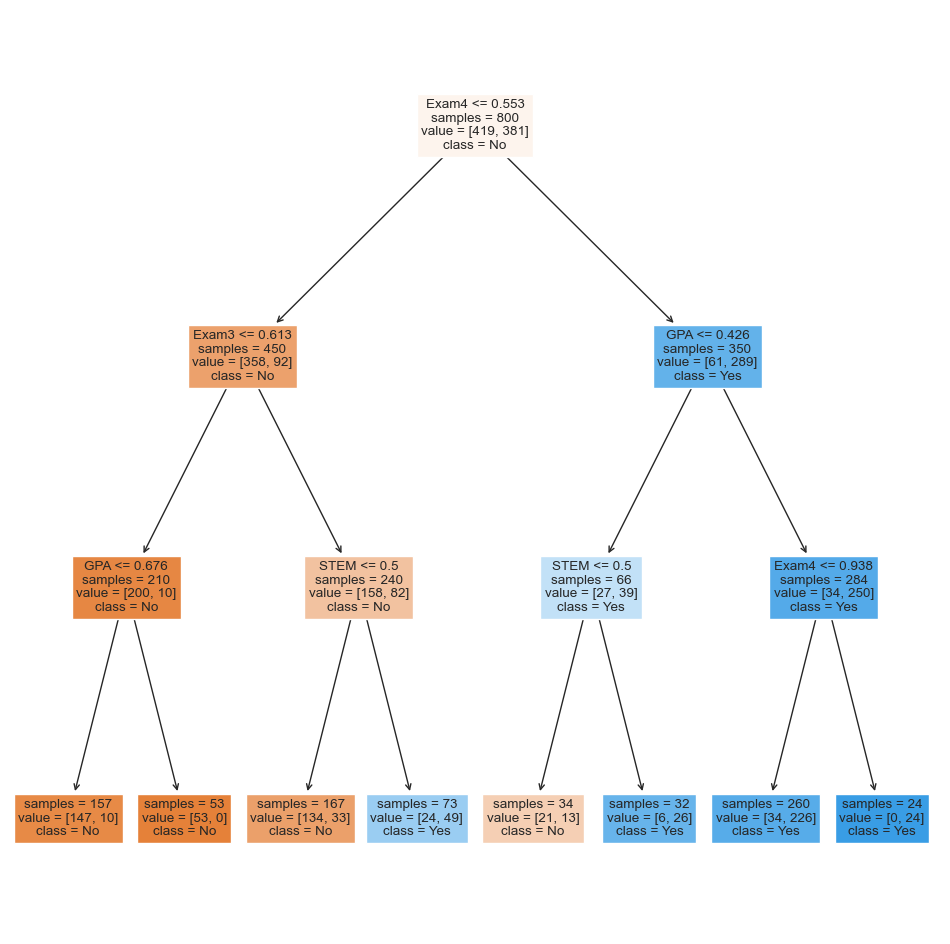

In [40]:
plt.subplots(figsize = (12,12))
plot_tree(dtc, filled = True, feature_names=X_train.columns,
          class_names = ['No','Yes'], impurity = False);

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 100, max_depth = 4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
actpredDf = pd.DataFrame( {'y_actual':y_test, 'y_pred':y_pred } )
actpredDf.T

,681,990,155,768,438,363,688,555,620,99,...,230,83,504,109,320,376,731,594,65,401
y_actual,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,1,1,1,1,0
y_pred,1,1,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,1,0


Now we test the model with the testing set

In [42]:
TestSet = pd.read_csv('BrightManuTest.csv')
TestSet.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,BUSN,Afternoon,3.17,85,76,86.0,97.0,1
1,1,PMED,Evening,2.23,80,68,NaN,NaN,0
2,0,STEM,Morning,2.53,89,88,83.0,90.0,1
3,0,PMED,Afternoon,3.03,81,77,78.0,93.0,1
4,1,STEM,Afternoon,2.93,92,86,90.0,NaN,1


In [43]:
TestSet.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
count,200.000000,200.000000,200.000000,200.000000,170.000000,118.000000,200.000000
mean,0.220000,2.477300,81.390000,79.040000,76.817647,75.118644,0.530000
std,0.415286,0.972735,8.386271,9.960142,13.994789,15.597046,0.500352
min,0.000000,0.300000,57.000000,49.000000,38.000000,48.000000,0.000000
25%,0.000000,1.765000,76.000000,72.000000,70.000000,59.250000,0.000000
50%,0.000000,2.525000,82.000000,79.000000,81.000000,80.000000,1.000000
75%,0.000000,3.212500,87.000000,86.000000,86.750000,90.000000,1.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,1.000000


We impute the missing values of the numeric features

In [44]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=1)
TestSet1 = TestSet[['Exam3','Exam4']]
TestSet1 = imp.fit_transform(TestSet1)
TestSet1 = pd.DataFrame(TestSet1, columns = ['Exam3','Exam4'])
TestSet1.head()

,Exam3,Exam4
0,86.000000,97.000000
1,76.817647,75.118644
2,83.000000,90.000000
3,78.000000,93.000000
4,90.000000,87.000000


In [45]:
TestSet11 = TestSet.copy()
TestSet11['Exam3']=TestSet1.Exam3
TestSet11.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,BUSN,Afternoon,3.17,85,76,86.000000,97.0,1
1,1,PMED,Evening,2.23,80,68,76.817647,NaN,0
2,0,STEM,Morning,2.53,89,88,83.000000,90.0,1
3,0,PMED,Afternoon,3.03,81,77,78.000000,93.0,1
4,1,STEM,Afternoon,2.93,92,86,90.000000,NaN,1


In [46]:
TestSet_1 = TestSet11.copy()
TestSet_1['Exam4']=TestSet1.Exam4
TestSet_1.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,BUSN,Afternoon,3.17,85,76,86.000000,97.000000,1
1,1,PMED,Evening,2.23,80,68,76.817647,75.118644,0
2,0,STEM,Morning,2.53,89,88,83.000000,90.000000,1
3,0,PMED,Afternoon,3.03,81,77,78.000000,93.000000,1
4,1,STEM,Afternoon,2.93,92,86,90.000000,87.000000,1


In [47]:
TestSet_11 = TestSet_1.drop(['Major'], axis=1)
MissCat1 = pd.DataFrame(TestSet_1, columns = ['Major'])
new_data1 = MissCat1.replace({'Major':{'????':'NA'}})
new_data1.head()

,Major
0,BUSN
1,PMED
2,STEM
3,PMED
4,STEM


In [48]:
from numpy import isnan
from sklearn.impute import SimpleImputer
value1 = new_data1.values

imputer = SimpleImputer(missing_values='NA',
                        strategy='most_frequent')
Transformed_values1 = imputer.fit_transform(value1)
Imp_Miss = pd.DataFrame(Transformed_values1, columns = ['Major'])
Imp_Miss.head()

,Major
0,BUSN
1,PMED
2,STEM
3,PMED
4,STEM


In [49]:
NewTestSet = TestSet_1.copy()
NewTestSet['Major']=Imputed_Missing.Major
NewTestSet.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,STEM,Afternoon,3.17,85,76,86.000000,97.000000,1
1,1,STEM,Evening,2.23,80,68,76.817647,75.118644,0
2,0,STEM,Morning,2.53,89,88,83.000000,90.000000,1
3,0,ARHU,Afternoon,3.03,81,77,78.000000,93.000000,1
4,1,STEM,Afternoon,2.93,92,86,90.000000,87.000000,1


In [50]:
cat = NewTestSet.select_dtypes(exclude = [int,float]).columns
cat

Index(['Major', 'TOD'], dtype='object')

In [51]:
ohe1 = OneHotEncoder( dtype = int )
NewTestSet_1 = NewTestSet.copy()

for category in categories: 
    encoded = ohe.fit_transform( NewTestSet[ [category] ] )
    ohe_Df = pd.DataFrame( encoded.todense(), 
                          columns = ohe.categories_[0])

    NewTestSet_1 = pd.concat([ohe_Df,NewTestSet_1], axis=1 )  
    NewTestSet_1.drop(category, axis=1, inplace=True)
NewTestSet_1.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,1,0,0,0,0,0,0,1,0,3.17,85,76,86.000000,97.000000,1
1,0,1,0,0,0,0,0,1,1,2.23,80,68,76.817647,75.118644,0
2,0,0,1,0,0,0,0,1,0,2.53,89,88,83.000000,90.000000,1
3,1,0,0,1,0,0,0,0,0,3.03,81,77,78.000000,93.000000,1
4,1,0,0,0,0,0,0,1,1,2.93,92,86,90.000000,87.000000,1


In [52]:
TestSetDf = NewTestSet_1.drop(['Calc2'], axis=1)
Resp = NewTestSet_1.Calc2
TestSetDf.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,0,0,1,0,3.17,85,76,86.000000,97.000000
1,0,1,0,0,0,0,0,1,1,2.23,80,68,76.817647,75.118644
2,0,0,1,0,0,0,0,1,0,2.53,89,88,83.000000,90.000000
3,1,0,0,1,0,0,0,0,0,3.03,81,77,78.000000,93.000000
4,1,0,0,0,0,0,0,1,1,2.93,92,86,90.000000,87.000000


In [53]:
sclr = MinMaxScaler( feature_range = (0,1) )
TestSetDf1Array = sclr.fit_transform(TestSetDf) 
TestSetDf1 = pd.DataFrame(TestSetDf1Array,
                              columns = TestSetDf.columns,
                              index = TestSetDf.index)
TestSetDf1.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.775676,0.651163,0.529412,0.774194,0.942308
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.521622,0.534884,0.372549,0.626091,0.521512
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.602703,0.744186,0.764706,0.725806,0.807692
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.737838,0.558140,0.549020,0.645161,0.865385
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.710811,0.813953,0.725490,0.838710,0.750000


Now we test the model with the test data

In [54]:
y_pred = rfc.predict(TestSetDf1)
actpredDf = pd.DataFrame( {'y_actual':Resp, 'y_pred':Resp } )
actpredDf.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
y_actual,1,0,1,1,1,1,1,0,0,0,...,0,1,0,1,1,1,1,1,1,1
y_pred,1,0,1,1,1,1,1,0,0,0,...,0,1,0,1,1,1,1,1,1,1


In [55]:
rfc.score(TestSetDf1,Resp)

0.78

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth':[None,2,3,4,5,6,7], 'min_samples_leaf':range(1,10,4) }
clf = GridSearchCV(rfc, parameters, cv = 5)
clf.fit(TestSetDf1, Resp)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': range(1, 10, 4)})

In [57]:
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

In [58]:
clf.best_score_

0.835

In [59]:
rfc_best = clf.best_estimator_

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_best,TestSetDf1, Resp, cv=5).mean()

0.8150000000000001

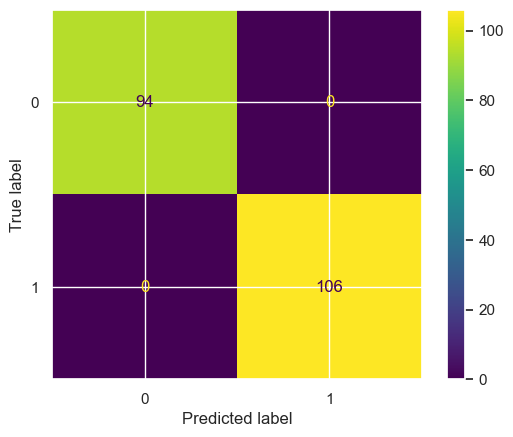

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(actpredDf['y_actual'], actpredDf['y_pred'])
ConfusionMatrixDisplay(cfm).plot();

In [62]:
cfm = pd.crosstab(actpredDf['y_actual'], actpredDf['y_pred'], 
                  rownames=['Actual'], colnames=['Predicted'], margins = True)
cfm

Predicted,0,1,All
Actual,,,
0,94,0,94
1,0,106,106
All,94,106,200


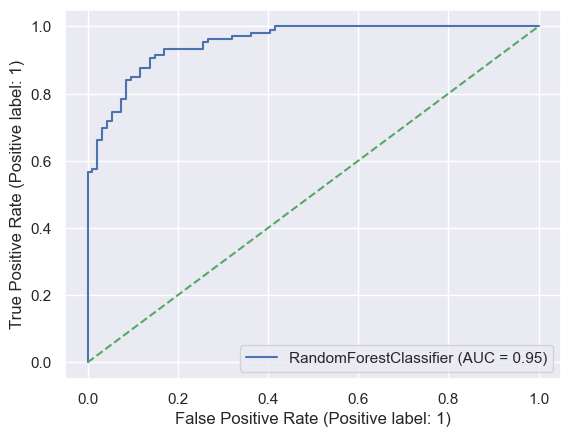

In [69]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc_best, TestSetDf1,Resp)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');

The ROC-AUC curc indicates that the model did well in predicting the data

In [64]:
rfc_best.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=347834453),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=1973984720),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=739259175),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=315357117),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=134149309),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=1052533201),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random_state=1973059659),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                        random

In [65]:
ScoresAndTrees = { 'scores': [] , 'trees': [] }
for Tree in rfc_best.estimators_:
    ScoresAndTrees['scores'].append(Tree.score(TestSetDf1.values, Resp.values))
    ScoresAndTrees['trees'].append(Tree)
ScoresAndTreesDf = pd.DataFrame(ScoresAndTrees)
ScoresAndTreesDf.sort_values('scores', inplace = True, ascending = False)

In [66]:
ScoresAndTreesDf.reset_index(drop = True, inplace = True)
ScoresAndTreesDf.head(10)

,scores,trees
0,0.865,"DecisionTreeClassifier(max_depth=6, max_featur..."
1,0.830,"DecisionTreeClassifier(max_depth=6, max_featur..."
2,0.830,"DecisionTreeClassifier(max_depth=6, max_featur..."
3,0.830,"DecisionTreeClassifier(max_depth=6, max_featur..."
4,0.825,"DecisionTreeClassifier(max_depth=6, max_featur..."
5,0.825,"DecisionTreeClassifier(max_depth=6, max_featur..."
6,0.825,"DecisionTreeClassifier(max_depth=6, max_featur..."
7,0.825,"DecisionTreeClassifier(max_depth=6, max_featur..."
8,0.820,"DecisionTreeClassifier(max_depth=6, max_featur..."
9,0.820,"DecisionTreeClassifier(max_depth=6, max_featur..."


In [67]:
Tree1 = ScoresAndTreesDf.trees[0]
Tree1.score(TestSetDf1,Resp)

C:\Users\manub\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.865

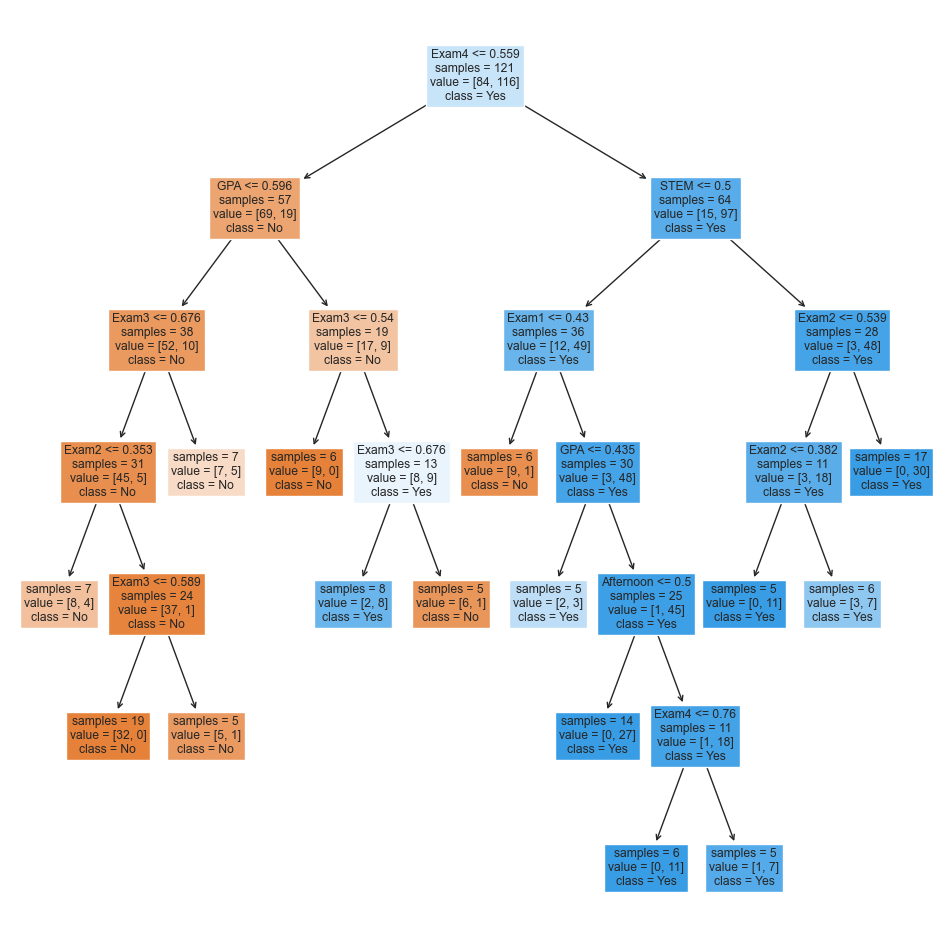

In [68]:
plt.subplots(figsize = (12,12))
plot_tree(Tree1, filled = True, feature_names=TestSetDf1.columns,
                 class_names = ['No','Yes'], impurity = False);